# Project 3 Part III

## Joseph Naro

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import clone_model, load_model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

# Part III: 1

### I have chosen the following 20 classes and used 500 images from each

bonsai,
chicken,
goldfish,
archery,
auto racing,
camping,
microorganism,
ray,
blue jay,
python,
centipede,
goose,
cow,
jellyfish,
snail,
king crab,
shrimp,
killer whale,
California sea lion,
dog,

# Part III: 2

### I have downloaded the images using the downloader from this repo: https://github.com/skaldek/ImageNet-Datasets-Downloader

# Part III: 3

### I modified the code Nitin provided in his demo to preprocess my data. First I manually went therough and deleted images that didn't belong in each dataset. Then I modified Nitin's code to crop each image as a square of size 375x375. I ended up only using the images as 256x256, but I wanted the option to go larger if I needed. I have included this code and highlighted my changes with comments. Finally, I manually modified the file structure to fit the requirements of the Keras flow_from_directory method.

In [4]:
training_meta = pd.read_csv('/content/gdrive/My Drive/train_data_paths_and_labels.csv')
training_meta

,Unnamed: 0,Path,Label
0,0,./images/archery/1.jpg,archery
1,1,./images/archery/2.jpg,archery
2,2,./images/archery/3.jpg,archery
3,3,./images/archery/4.jpg,archery
4,4,./images/archery/5.jpg,archery
...,...,...,...
7595,7595,./images/snail/396.jpg,snail
7596,7596,./images/snail/397.jpg,snail
7597,7597,./images/snail/398.jpg,snail
7598,7598,./images/snail/399.jpg,snail


In [5]:
labels = list(training_meta['Label'].unique())
labels

['archery',
 'auto racing',
 'blue jay',
 'bonsai',
 'California sea lion',
 'centipede',
 'chicken',
 'cow',
 'dog',
 'goldfish',
 'goose',
 'jellyfish',
 'killer whale',
 'king crab',
 'microorganism',
 'python',
 'ray',
 'shrimp',
 'snail']

In [6]:
training_generator = ImageDataGenerator(rescale=1./255, validation_split=.2, horizontal_flip=True, height_shift_range=.2, width_shift_range=.2, zoom_range=.2)
training_data = training_generator.flow_from_directory('/content/gdrive/My Drive/images/train', batch_size=64, class_mode='sparse', subset='training')
validating_data = training_generator.flow_from_directory('/content/gdrive/My Drive/images/train', batch_size=64, class_mode='sparse', subset='validation')

Found 6403 images belonging to 20 classes.
Found 1600 images belonging to 20 classes.


In [7]:
test1, test2 = training_data.next()

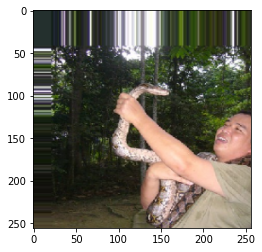

In [8]:
plt.imshow(test1[1])

In [6]:
testing_generator = ImageDataGenerator(rescale=1./255)
testing_data = testing_generator.flow_from_directory('/content/gdrive/My Drive/images/test', batch_size=64, class_mode='sparse')

Found 2000 images belonging to 20 classes.


# Part III: 4 & 5

In [10]:
stopper = EarlyStopping(monitor='val_accuracy', patience=7)

In [11]:
part3_model_1 = Sequential()
part3_model_1.add(layers.AveragePooling2D(input_shape=(256,256,3,)))
part3_model_1.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_1.add(layers.MaxPooling2D())
part3_model_1.add(layers.BatchNormalization())
part3_model_1.add(layers.Dropout(0.3))
part3_model_1.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_1.add(layers.MaxPooling2D())
part3_model_1.add(layers.BatchNormalization())
part3_model_1.add(layers.Dropout(0.3))
part3_model_1.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_1.add(layers.BatchNormalization())
part3_model_1.add(layers.Dropout(0.3))
part3_model_1.add(layers.Conv2D(kernel_size=5, filters=256, activation='relu'))
part3_model_1.add(layers.BatchNormalization())
part3_model_1.add(layers.Dropout(0.3))
part3_model_1.add(layers.Flatten())
part3_model_1.add(layers.Dense(512, activation='relu'))
part3_model_1.add(layers.Dense(256, activation='relu'))
part3_model_1.add(layers.Dense(20, activation='softmax'))
part3_model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 124, 124, 128)     9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 128)       512       
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 58, 128)       409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 128)       0

In [12]:
part3_model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [13]:
part3_model_1_history = part3_model_1.fit(training_data, batch_size = 64, steps_per_epoch=6_400/64, epochs=50, verbose=1, validation_data=validating_data, callbacks=stopper)
part3_model_1.save_weights('/content/gdrive/My Drive/part3_model_1.h5')

Epoch 1/50
100/100 [==============================] - 130s 1s/step - loss: 8.1372 - accuracy: 0.0855 - sparse_categorical_crossentropy: 8.1372 - val_loss: 12.2937 - val_accuracy: 0.0544 - val_sparse_categorical_crossentropy: 12.2937
Epoch 2/50
100/100 [==============================] - 130s 1s/step - loss: 3.0146 - accuracy: 0.0476 - sparse_categorical_crossentropy: 3.0146 - val_loss: 2.9875 - val_accuracy: 0.0519 - val_sparse_categorical_crossentropy: 2.9875
Epoch 3/50
100/100 [==============================] - 130s 1s/step - loss: 3.0127 - accuracy: 0.0487 - sparse_categorical_crossentropy: 3.0127 - val_loss: 2.9958 - val_accuracy: 0.0500 - val_sparse_categorical_crossentropy: 2.9958
Epoch 4/50
100/100 [==============================] - 130s 1s/step - loss: 3.0012 - accuracy: 0.0456 - sparse_categorical_crossentropy: 3.0012 - val_loss: 3.0000 - val_accuracy: 0.0500 - val_sparse_categorical_crossentropy: 3.0000
Epoch 5/50
100/100 [==============================] - 130s 1s/step - loss:

KeyboardInterrupt: ignored

## This was my model from Part II with extra neurons on the last layer for the extra classes. It performed about as poorly as possible. With an accuracy of 0.05, the model did as well as random chance.

In [14]:
part3_model_2 = Sequential()
part3_model_2.add(layers.AveragePooling2D(input_shape=(256,256,3,)))
part3_model_2.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_2.add(layers.BatchNormalization())
part3_model_2.add(layers.MaxPooling2D())
part3_model_2.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_2.add(layers.BatchNormalization())
part3_model_2.add(layers.Dropout(0.3))
part3_model_2.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_2.add(layers.BatchNormalization())
part3_model_2.add(layers.Dropout(0.3))
part3_model_2.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_2.add(layers.BatchNormalization())
part3_model_2.add(layers.Dropout(0.3))
part3_model_2.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_2.add(layers.BatchNormalization())
part3_model_2.add(layers.Dropout(0.3))
part3_model_2.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_2.add(layers.BatchNormalization())
part3_model_2.add(layers.Dropout(0.3))
part3_model_2.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_2.add(layers.BatchNormalization())
part3_model_2.add(layers.Dropout(0.3))
part3_model_2.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_2.add(layers.BatchNormalization())
part3_model_2.add(layers.Dropout(0.3))
part3_model_2.add(layers.Flatten())
part3_model_2.add(layers.Dense(512, activation='relu'))
part3_model_2.add(layers.Dense(256, activation='relu'))
part3_model_2.add(layers.Dense(20, activation='softmax'))
part3_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d_1 (Average (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 128)     9728      
_________________________________________________________________
batch_normalization_4 (Batch (None, 124, 124, 128)     512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 58, 58, 128)       409728    
_________________________________________________________________
batch_normalization_5 (Batch (None, 58, 58, 128)       512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 58, 58, 128)      

In [15]:
part3_model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [16]:
part3_model_2_history = part3_model_2.fit(training_data, batch_size = 64, steps_per_epoch=6_400/64, epochs=50, verbose=1, validation_data=validating_data, callbacks=stopper)
part3_model_2.save_weights('/content/gdrive/My Drive/part3_model_2.h5')

Epoch 1/50
100/100 [==============================] - 139s 1s/step - loss: 4.8982 - accuracy: 0.0637 - sparse_categorical_crossentropy: 4.8982 - val_loss: 3.0421 - val_accuracy: 0.0556 - val_sparse_categorical_crossentropy: 3.0421
Epoch 2/50
100/100 [==============================] - 139s 1s/step - loss: 3.0148 - accuracy: 0.0453 - sparse_categorical_crossentropy: 3.0148 - val_loss: 3.0022 - val_accuracy: 0.0519 - val_sparse_categorical_crossentropy: 3.0022
Epoch 3/50
100/100 [==============================] - 139s 1s/step - loss: 3.0031 - accuracy: 0.0506 - sparse_categorical_crossentropy: 3.0031 - val_loss: 3.0102 - val_accuracy: 0.0494 - val_sparse_categorical_crossentropy: 3.0102
Epoch 4/50
100/100 [==============================] - 138s 1s/step - loss: 3.0030 - accuracy: 0.0483 - sparse_categorical_crossentropy: 3.0030 - val_loss: 2.9978 - val_accuracy: 0.0500 - val_sparse_categorical_crossentropy: 2.9978
Epoch 5/50
100/100 [==============================] - 138s 1s/step - loss: 2

## This model went about as well as the last. I added extra counvolutional layers, but I think that it would have benefitted more from another dense layer to help it learn.

In [23]:
part3_model_3 = Sequential()
part3_model_3.add(layers.AveragePooling2D(input_shape=(256,256,3,)))
part3_model_3.add(layers.Conv2D(kernel_size=5, strides=2, filters=128, activation='relu'))
part3_model_3.add(layers.MaxPooling2D())
part3_model_3.add(layers.BatchNormalization())
part3_model_3.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_3.add(layers.BatchNormalization())
part3_model_3.add(layers.Dropout(0.3))
part3_model_3.add(layers.Conv2D(kernel_size=5, filters=128, activation='relu'))
part3_model_3.add(layers.BatchNormalization())
part3_model_3.add(layers.Dropout(0.3))
part3_model_3.add(layers.Conv2D(kernel_size=5, filters=256, activation='relu'))
part3_model_3.add(layers.BatchNormalization())
part3_model_3.add(layers.Dropout(0.3))
part3_model_3.add(layers.Flatten())
part3_model_3.add(layers.Dense(1024, activation='relu'))
part3_model_3.add(layers.Dense(512, activation='relu'))
part3_model_3.add(layers.Dense(256, activation='relu'))
part3_model_3.add(layers.Dense(20, activation='softmax'))
part3_model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d_4 (Average (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 62, 62, 128)       9728      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 31, 31, 128)       512       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 27, 27, 128)       409728    
_________________________________________________________________
batch_normalization_21 (Batc (None, 27, 27, 128)       512       
_________________________________________________________________
dropout_19 (Dropout)         (None, 27, 27, 128)      

In [24]:
part3_model_3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [25]:
part3_model_3_history = part3_model_3.fit(training_data, batch_size = 64, steps_per_epoch=6_400/64, epochs=50, verbose=1, validation_data=validating_data, callbacks=stopper)
part3_model_3.save_weights('/content/gdrive/My Drive/part3_model_3.h5')

Epoch 1/50
100/100 [==============================] - 127s 1s/step - loss: 4.6031 - accuracy: 0.1319 - sparse_categorical_crossentropy: 4.6031 - val_loss: 5.3841 - val_accuracy: 0.0331 - val_sparse_categorical_crossentropy: 5.3841
Epoch 2/50
100/100 [==============================] - 128s 1s/step - loss: 2.8116 - accuracy: 0.1604 - sparse_categorical_crossentropy: 2.8116 - val_loss: 3.1288 - val_accuracy: 0.0619 - val_sparse_categorical_crossentropy: 3.1288
Epoch 3/50
100/100 [==============================] - 129s 1s/step - loss: 2.6565 - accuracy: 0.1978 - sparse_categorical_crossentropy: 2.6565 - val_loss: 2.7585 - val_accuracy: 0.1525 - val_sparse_categorical_crossentropy: 2.7585
Epoch 4/50
100/100 [==============================] - 130s 1s/step - loss: 2.5514 - accuracy: 0.2188 - sparse_categorical_crossentropy: 2.5514 - val_loss: 2.7846 - val_accuracy: 0.1906 - val_sparse_categorical_crossentropy: 2.7846
Epoch 5/50
100/100 [==============================] - 129s 1s/step - loss: 2

In [26]:
part3_model_3_score = part3_model_3.evaluate(testing_data, verbose=1)

32/32 [==============================] - 10s 328ms/step - loss: 2.0238 - accuracy: 0.4060 - sparse_categorical_crossentropy: 2.0238


## This model is much more promising. training stopped when the early stopping condition was met, but judging by the plots below, it still has more room for improvement. I want to see how tweaking the optimization function will affect things.

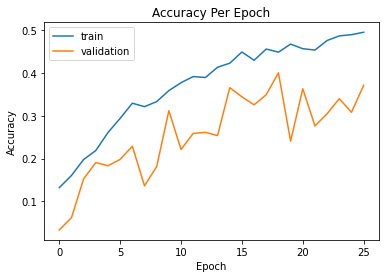

In [27]:
plt.plot(part3_model_3_history.history['accuracy'])
plt.plot(part3_model_3_history.history['val_accuracy'])
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

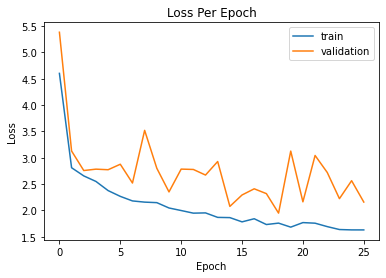

In [28]:
plt.plot(part3_model_3_history.history['loss'])
plt.plot(part3_model_3_history.history['val_loss'])
plt.title('Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])

In [ ]:
part3_model_3_1_history = part3_model_3_1.fit(training_data, batch_size = 64, steps_per_epoch=6_400/64, epochs=50, verbose=1, validation_data=validating_data, callbacks=stopper)
part3_model_3_1.save_weights('/content/gdrive/My Drive/part3_model_3_1.h5')

In [ ]:
part3_model_3_1_score = part3_model_3_1.evaluate(testing_data, verbose=1)

In [32]:
part3_model_3_2 = clone_model(part3_model_3)

In [33]:
adam = Adam(amsgrad=True)
part3_model_3_2.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy', 'sparse_categorical_crossentropy'])

In [35]:
part3_model_3_2_history = part3_model_3_2.fit(training_data, batch_size = 64, steps_per_epoch=6_400/64, epochs=50, verbose=1, validation_data=validating_data, callbacks=stopper)
part3_model_3_2.save_weights('/content/gdrive/My Drive/part3_model_3_2.h5')

Epoch 1/50
100/100 [==============================] - 126s 1s/step - loss: 3.5332 - accuracy: 0.0992 - sparse_categorical_crossentropy: 3.5332 - val_loss: 3.0030 - val_accuracy: 0.0525 - val_sparse_categorical_crossentropy: 3.0030
Epoch 2/50
100/100 [==============================] - 127s 1s/step - loss: 2.8589 - accuracy: 0.1082 - sparse_categorical_crossentropy: 2.8589 - val_loss: 2.9573 - val_accuracy: 0.0725 - val_sparse_categorical_crossentropy: 2.9573
Epoch 3/50
100/100 [==============================] - 127s 1s/step - loss: 2.7227 - accuracy: 0.1622 - sparse_categorical_crossentropy: 2.7227 - val_loss: 2.8891 - val_accuracy: 0.1138 - val_sparse_categorical_crossentropy: 2.8891
Epoch 4/50
100/100 [==============================] - 127s 1s/step - loss: 2.6150 - accuracy: 0.1932 - sparse_categorical_crossentropy: 2.6150 - val_loss: 2.6000 - val_accuracy: 0.1994 - val_sparse_categorical_crossentropy: 2.6000
Epoch 5/50
100/100 [==============================] - 127s 1s/step - loss: 2

In [36]:
part3_model_3_2_score = part3_model_3_2.evaluate(testing_data, verbose=1)

32/32 [==============================] - 9s 280ms/step - loss: 2.2043 - accuracy: 0.4120 - sparse_categorical_crossentropy: 2.2043


In [38]:
part3_model_3_2_history_2 = part3_model_3_2.fit(training_data, batch_size = 64, steps_per_epoch=6_400/64, epochs=50, verbose=1, validation_data=validating_data, callbacks=stopper)
part3_model_3_2.save_weights('/content/gdrive/My Drive/part3_model_3_2_2.h5')

Epoch 1/50
100/100 [==============================] - 125s 1s/step - loss: 1.2614 - accuracy: 0.5995 - sparse_categorical_crossentropy: 1.2614 - val_loss: 2.2374 - val_accuracy: 0.4006 - val_sparse_categorical_crossentropy: 2.2374
Epoch 2/50
100/100 [==============================] - 125s 1s/step - loss: 1.2585 - accuracy: 0.6099 - sparse_categorical_crossentropy: 1.2585 - val_loss: 2.1497 - val_accuracy: 0.4100 - val_sparse_categorical_crossentropy: 2.1497
Epoch 3/50
100/100 [==============================] - 124s 1s/step - loss: 1.2329 - accuracy: 0.6135 - sparse_categorical_crossentropy: 1.2329 - val_loss: 1.8229 - val_accuracy: 0.5094 - val_sparse_categorical_crossentropy: 1.8229
Epoch 4/50
100/100 [==============================] - 124s 1s/step - loss: 1.1858 - accuracy: 0.6234 - sparse_categorical_crossentropy: 1.1858 - val_loss: 2.3265 - val_accuracy: 0.4363 - val_sparse_categorical_crossentropy: 2.3265
Epoch 5/50
100/100 [==============================] - 125s 1s/step - loss: 1

In [41]:
part3_model_3_2_score_2 = part3_model_3_2.evaluate(testing_data, verbose=1)

32/32 [==============================] - 9s 267ms/step - loss: 2.2071 - accuracy: 0.4530 - sparse_categorical_crossentropy: 2.2071


In [40]:
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/best.hdf5', save_best_only=True)

In [42]:
part3_model_3_2_history_3 = part3_model_3_2.fit(training_data, batch_size = 64, steps_per_epoch=6_400/64, epochs=50, verbose=1, validation_data=validating_data, callbacks=[stopper, checkpoint])
part3_model_3_2.save_weights('/content/gdrive/My Drive/part3_model_3_2_3.h5')

Epoch 1/50
100/100 [==============================] - 132s 1s/step - loss: 1.1004 - accuracy: 0.6561 - sparse_categorical_crossentropy: 1.1004 - val_loss: 3.2503 - val_accuracy: 0.2937 - val_sparse_categorical_crossentropy: 3.2503
Epoch 2/50
100/100 [==============================] - 140s 1s/step - loss: 1.1882 - accuracy: 0.6324 - sparse_categorical_crossentropy: 1.1882 - val_loss: 1.8284 - val_accuracy: 0.4994 - val_sparse_categorical_crossentropy: 1.8284
Epoch 3/50
100/100 [==============================] - 129s 1s/step - loss: 1.0612 - accuracy: 0.6673 - sparse_categorical_crossentropy: 1.0612 - val_loss: 2.6086 - val_accuracy: 0.4094 - val_sparse_categorical_crossentropy: 2.6086
Epoch 4/50
100/100 [==============================] - 138s 1s/step - loss: 1.0905 - accuracy: 0.6640 - sparse_categorical_crossentropy: 1.0905 - val_loss: 1.6950 - val_accuracy: 0.5456 - val_sparse_categorical_crossentropy: 1.6950
Epoch 5/50
100/100 [==============================] - 131s 1s/step - loss: 1

In [43]:
part3_model_3_2_score_3 = part3_model_3_2.evaluate(testing_data, verbose=1)

32/32 [==============================] - 9s 290ms/step - loss: 2.3765 - accuracy: 0.4200 - sparse_categorical_crossentropy: 2.3765


In [7]:
best = load_model('/content/gdrive/My Drive/best.hdf5')

In [46]:
best_score = best.evaluate(testing_data, verbose=1)

32/32 [==============================] - 9s 273ms/step - loss: 1.6409 - accuracy: 0.5575 - sparse_categorical_crossentropy: 1.6409


## As can be seen above, I was finally able to get a testing accuracy greater than 0.5. This is the same model as before, but I enable amsgrad for the Adam optimizer. I also continued to train it after it triggered the early stopping conditions. As you can see on the plot below, the accuracy still has not plateaued, so it is likely possible to train the model for even greater accuracy.

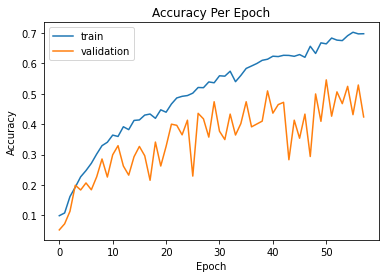

In [109]:
train_acc = part3_model_3_2_history.history['accuracy'] + part3_model_3_2_history_2.history['accuracy'] + part3_model_3_2_history_3.history['accuracy']
val_acc = part3_model_3_2_history.history['val_accuracy'] + part3_model_3_2_history_2.history['val_accuracy'] + part3_model_3_2_history_3.history['val_accuracy']
plt.plot(range(len(train_acc)), train_acc)
plt.plot(range(len(val_acc)), val_acc)
plt.title('Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])

### Here we have the confusion matrix for the end state of model 3 after training. As you can see, it has an odd tendency to misidentify several animals as car races. Perhaps the decals covering cars throw off the model.

In [9]:
predictions = part3_model_3_2.predict(testing_data)
confusion_matrix_3 = confusion_matrix(testing_data.classes, predictions.argmax(axis=1))
print(confusion_matrix_3)

[[ 7  3  4  7  5  3  3  3 10  1  3  7  2  3  4  6  8 12  6  3]
 [12 10  4  2  3  4  4  4  9  1  3  8  7  5  5  2  4  7  1  5]
 [ 3 15  5  7  5  2  4  4  3  5  2  6  3  5  2  5  9  5  4  6]
 [ 3 12  5  4  4  2  2  4  6  4  1 12  6  6  6  3  7  7  3  3]
 [ 5  8  8  4  7  6  1  0  9  2  1  7  4  4  3  5  7  7  6  6]
 [ 1 13  8  7  8  2  6  3  1  5  3  5  7  3  5  3  7  4  7  2]
 [ 4  8  9  5  4  7  3  1  4  3  3  9 10  4  3  8  3  5  2  5]
 [ 7 10  6  2  3  7  3  5  6  3  2  6  4  4  3  3  8  6  5  7]
 [ 9  6  7  3  5  4  3  2  4  1  9  5  4  4  6  6 11  1  8  2]
 [ 5 13  1  8  8  6  1  2  4  2  4  7  4  3  2  2 11 10  4  3]
 [ 3 10  7  4  3  7  7  1  4  3  1  7  5  5  2  5 12  7  1  6]
 [ 7  8  6  4  6  4  5  5  3  1  8  5  3  5  0  4  7 10  7  2]
 [ 3  9  6  6  1  7  5  4  3  3  3  5  8  7  8  7  5  3  6  1]
 [ 6  9  4  4  3  7  4  4 11  3  3  9  3  6  2  5  2  5  8  2]
 [ 4 12  5  2  5  4  1  3  3  5  3  7  6  4  6  3  7  5  5 10]
 [ 4  3  7  6  7  2  3  5  4  1  4 11  6  8  4  3  4  5

['archery',
 'auto racing',
 'blue jay',
 'bonsai',
 'California sea lion',
 'centipede',
 'chicken',
 'cow',
 'dog',
 'goldfish',
 'goose',
 'jellyfish',
 'killer whale',
 'king crab',
 'microorganism',
 'python',
 'ray',
 'shrimp',
 'snail']